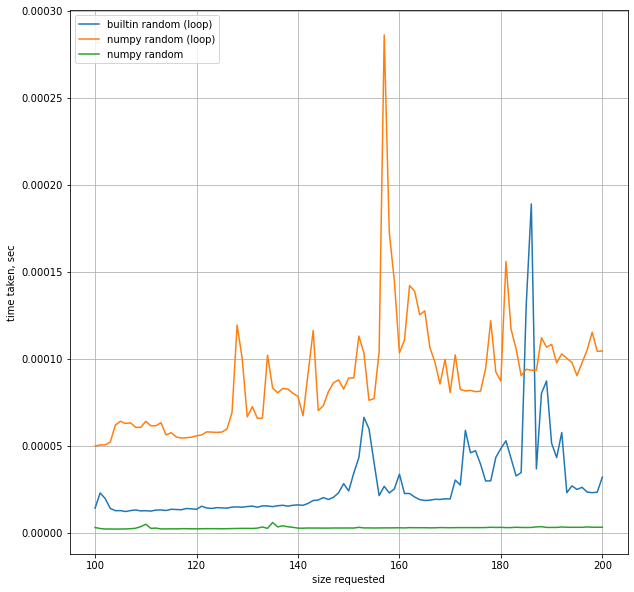

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import random
import time

# range

N_trials = 1000
min_size, max_size = 100, 200

time_array_random = []
for i in range(min_size, max_size+1):
    # trials
    avg_time = 0
    for j in range(1, N_trials):
        start = time.time()
        for _ in range(i):
            random.random()
        end = time.time()
        diff = end - start
        avg_time = avg_time + diff
    avg_time = avg_time / N_trials
    time_array_random.append(avg_time)

time_array_numpy = []
for i in range(min_size, max_size+1):
    # trials
    avg_time = 0
    for j in range(N_trials):
        start = time.time()
        for _ in range(i):
            np.random.rand()
        end = time.time()
        diff = end - start
        avg_time = avg_time + diff
    avg_time = avg_time / N_trials
    time_array_numpy.append(avg_time)

time_array_numpy_arr = []
for i in range(min_size, max_size+1):
    # trials
    avg_time = 0
    for j in range(N_trials):
        start = time.time()
        np.random.rand(i)
        end = time.time()
        diff = end - start
        avg_time = avg_time + diff
    avg_time = avg_time / N_trials
    time_array_numpy_arr.append(avg_time)

fig, ax = plt.subplots(figsize=(10, 10))

x = list(range(min_size, max_size+1))
ax.plot(x, time_array_random, label='builtin random (loop)')
ax.plot(x, time_array_numpy, label='numpy random (loop)')
ax.plot(x, time_array_numpy_arr, label='numpy random')
ax.set_ylabel('time taken, sec')
ax.set_xlabel('size requested')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

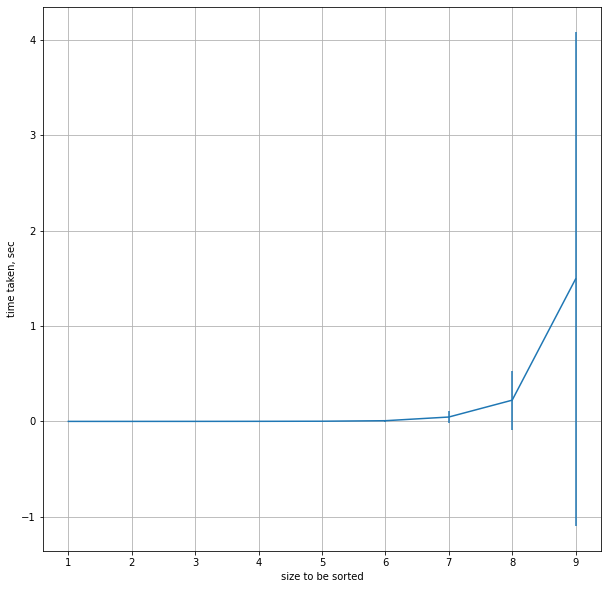

In [7]:
#2
import matplotlib.pyplot as plt
import numpy as np
import random
import time

N_trials = 50
min_size, max_size = 1, 9

time_array_sort_mean = []
time_array_sort_std = []
x = list(range(min_size, max_size + 1))
is_sorted = lambda l: all(l[i] <= l[i+1] for i in range(len(l)-1))

for i in range(min_size, max_size + 1):
    # trials
    times = []
    for j in range(N_trials):
        rand_list = np.random.randint(0, 10, size=i)
        start = time.time()

        # bogosort
        while not is_sorted(rand_list):
            [a, b] = np.random.randint(0, i, size=2)
            rand_list[a], rand_list[b] = rand_list[b], rand_list[a] 

        end = time.time()
        diff = end - start
        times.append(diff)
    avg_time = np.mean(times)
    std = np.std(times)
    time_array_sort_mean.append(avg_time)
    time_array_sort_std.append(std)

fig, ax = plt.subplots(figsize=(10, 10))
ax.errorbar(x, time_array_sort_mean, time_array_sort_std)
ax.set_ylabel('time taken, sec')
ax.set_xlabel('size to be sorted')
plt.grid(True)
plt.show()   
#plt.savefig("test.png")